<a href="https://colab.research.google.com/github/FFazzano/Analise-COVID-19/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importacao de biblioteca e analise de crescimento do covid por pais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url)


In [3]:
global_cases = confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
global_cases = global_cases.reset_index()
global_cases.columns = ['date', 'total_cases']
global_cases['date'] = pd.to_datetime(global_cases['date'])


In [5]:
# Visualização da tabela de casos confirmados globais ao longo do tempo
print(global_cases)


           date  total_cases
0    2020-01-22          557
1    2020-01-23          657
2    2020-01-24          944
3    2020-01-25         1437
4    2020-01-26         2120
...         ...          ...
1138 2023-03-05    676024901
1139 2023-03-06    676082941
1140 2023-03-07    676213378
1141 2023-03-08    676392824
1142 2023-03-09    676570149

[1143 rows x 2 columns]


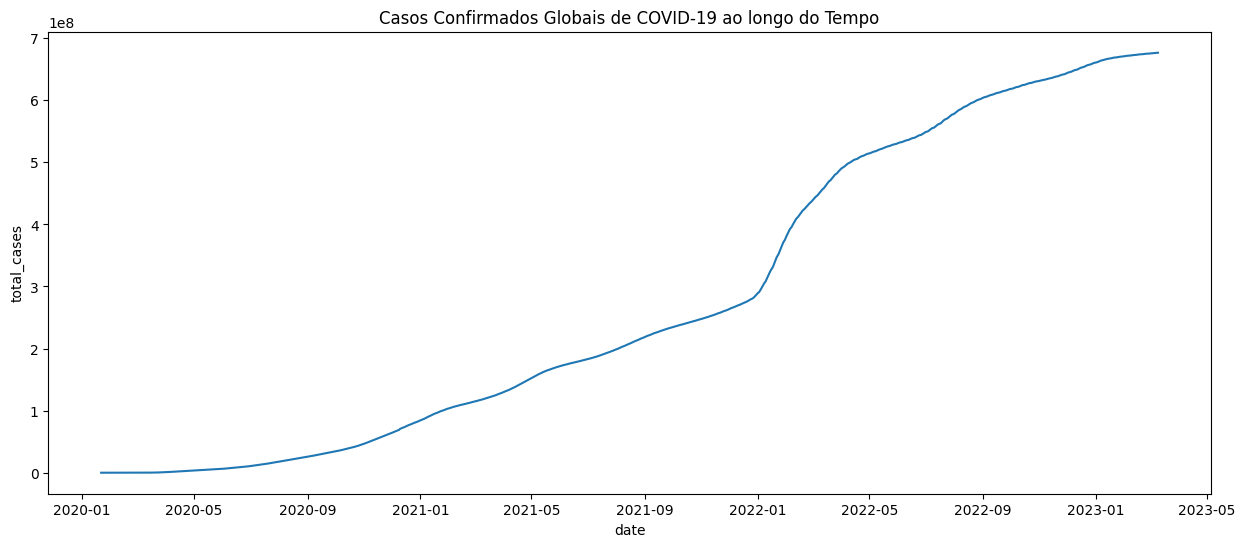

In [4]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=global_cases, x='date', y='total_cases')
plt.title('Casos Confirmados Globais de COVID-19 ao longo do Tempo')
plt.show()


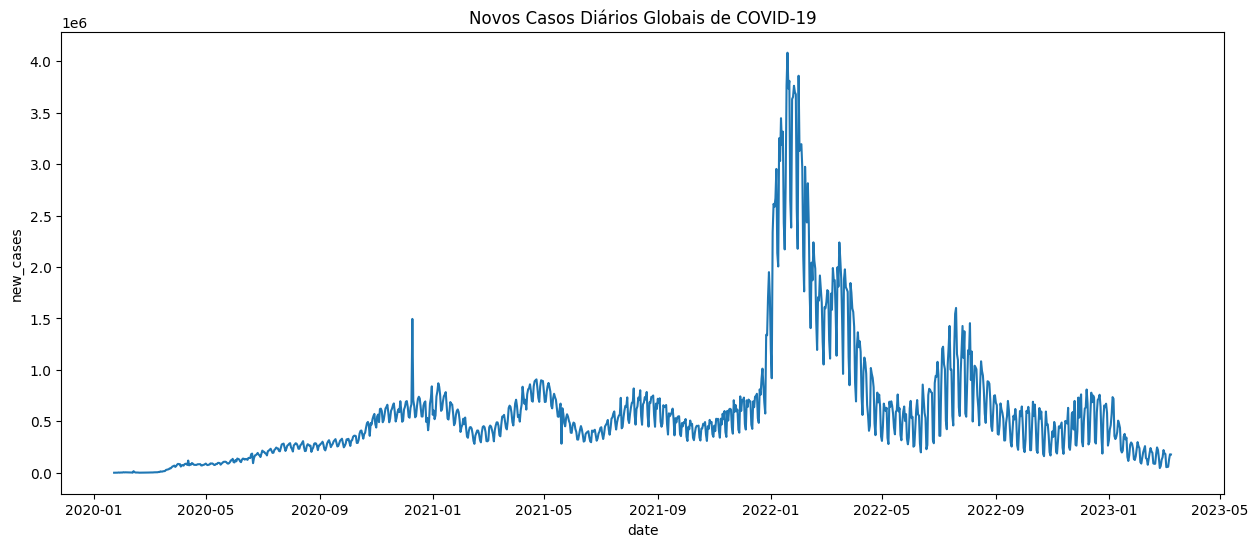

In [7]:
global_cases['new_cases'] = global_cases['total_cases'].diff()

plt.figure(figsize=(15, 6))
sns.lineplot(data=global_cases, x='date', y='new_cases')
plt.title('Novos Casos Diários Globais de COVID-19')
plt.show()


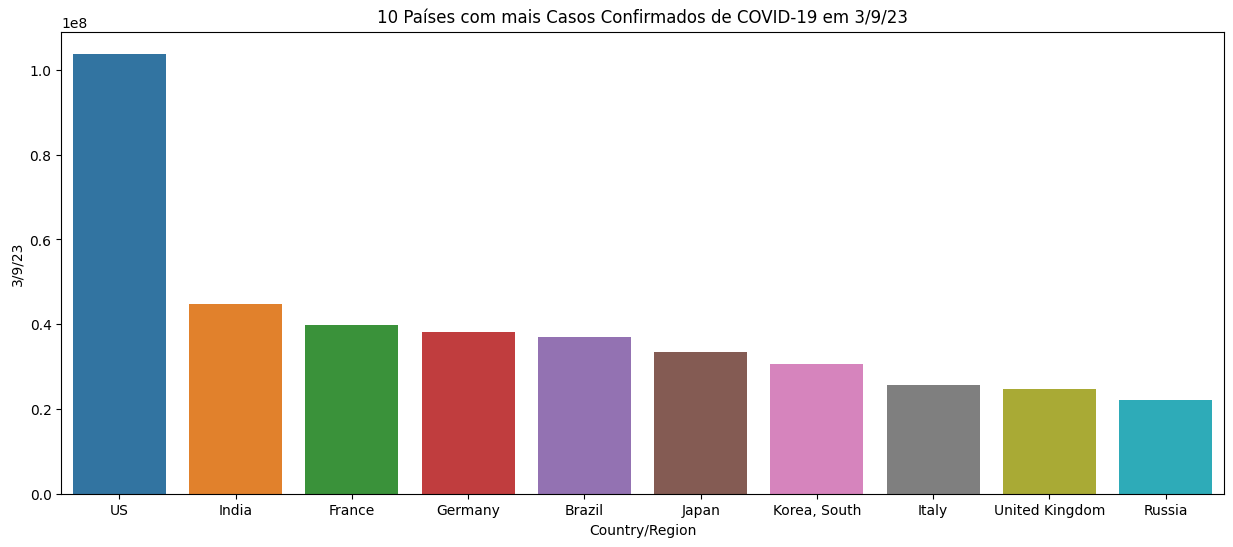

In [6]:
latest_date = confirmed.columns[-1]
confirmed_by_country = confirmed.groupby('Country/Region')[latest_date].sum().sort_values(ascending=False).reset_index()
top_countries = confirmed_by_country.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(data=top_countries, x='Country/Region', y=latest_date)
plt.title(f'10 Países com mais Casos Confirmados de COVID-19 em {latest_date}')
plt.show()


# Carregar dados das mortes



In [8]:
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths = pd.read_csv(url_deaths)


In [9]:
latest_date = deaths.columns[-1]
deaths_by_country = deaths.groupby('Country/Region')[latest_date].sum()
confirmed_by_country = confirmed.groupby('Country/Region')[latest_date].sum()


In [10]:
mortality_rate = (deaths_by_country / confirmed_by_country) * 100
mortality_rate = mortality_rate.sort_values(ascending=False).reset_index()
mortality_rate.columns = ['Country/Region', 'Mortality Rate']


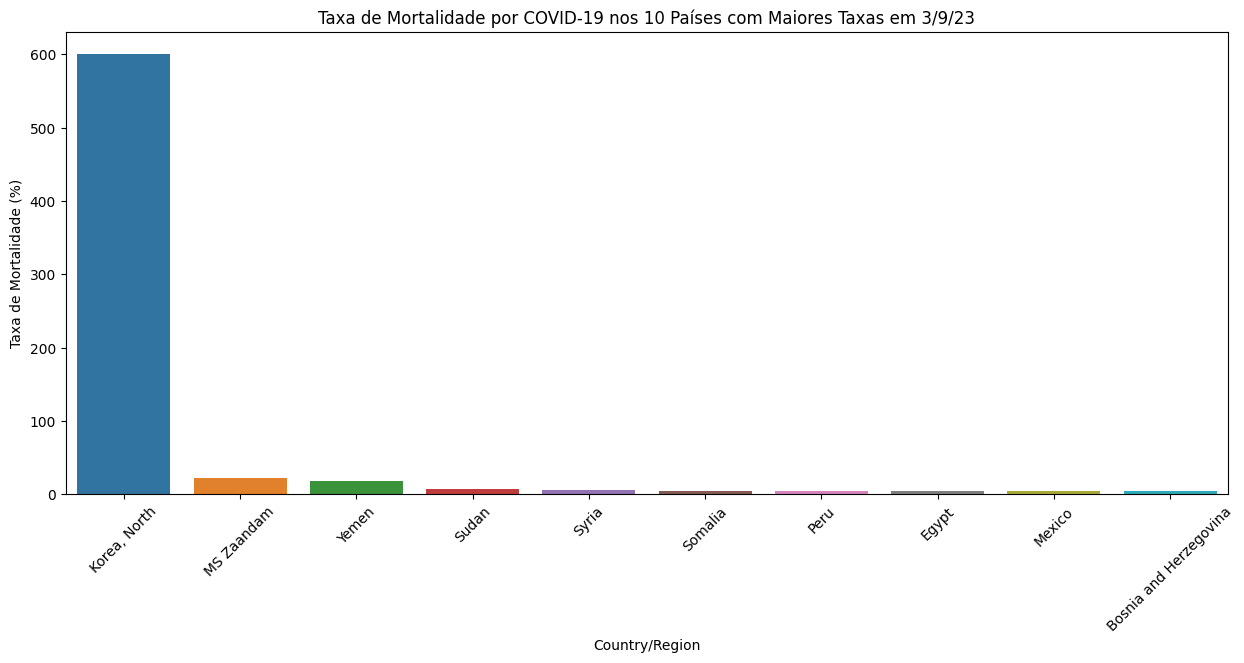

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(data=mortality_rate.head(10), x='Country/Region', y='Mortality Rate')
plt.title(f'Taxa de Mortalidade por COVID-19 nos 10 Países com Maiores Taxas em {latest_date}')
plt.ylabel('Taxa de Mortalidade (%)')
plt.xticks(rotation=45)
plt.show()


Nota: A taxa de mortalidade pode ser influenciada por vários fatores, incluindo a capacidade de teste e políticas de relato de cada país, bem como a capacidade de tratamento médico e a demografia da população. Sempre use essa métrica com cautela e considere o contexto mais amplo.

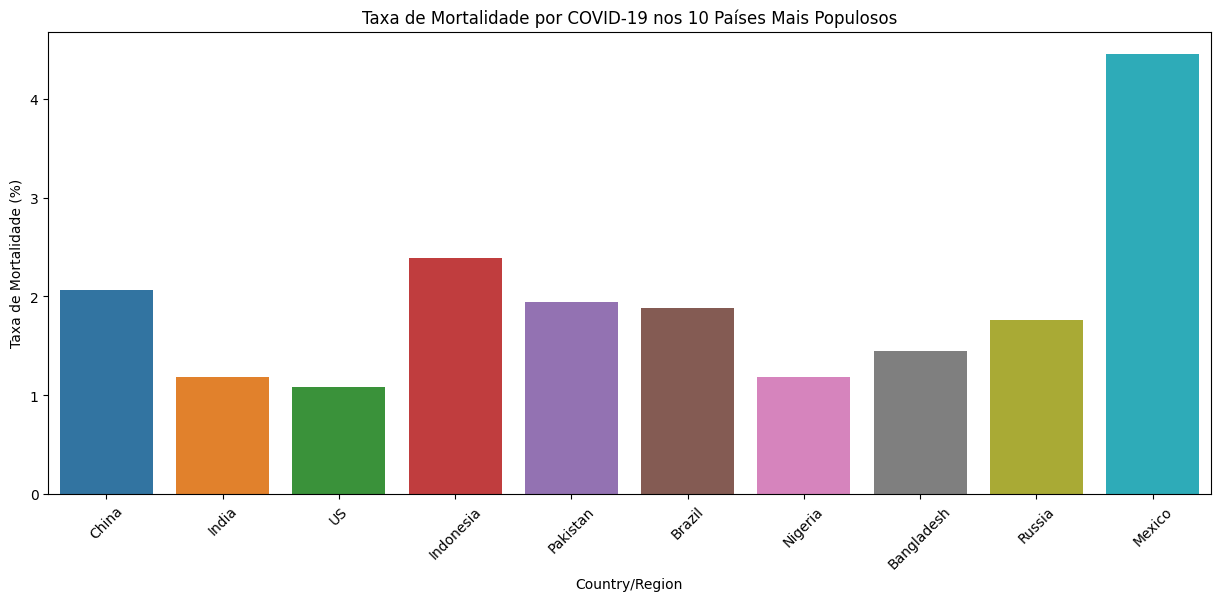

In [12]:
# Lista dos 10 países mais populosos
top_population_countries = [
    "China", "India", "US", "Indonesia", "Pakistan",
    "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico"
]

# Filtrar a taxa de mortalidade para estes países
mortality_rate_top_countries = mortality_rate[mortality_rate['Country/Region'].isin(top_population_countries)]

# Visualização da taxa de mortalidade para os 10 países mais populosos
plt.figure(figsize=(15, 6))
sns.barplot(data=mortality_rate_top_countries, x='Country/Region', y='Mortality Rate', order=top_population_countries)
plt.title('Taxa de Mortalidade por COVID-19 nos 10 Países Mais Populosos')
plt.ylabel('Taxa de Mortalidade (%)')
plt.xticks(rotation=45)
plt.show()
